# Weekly project part 1
    Using the image "appletree.jpg"
    A) Can you segment the apples from the tree?
    B) Can you get the computer to count how many there are?
    C) Can you change color of one of them?
    D) Can you segment the leaves?

In [169]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

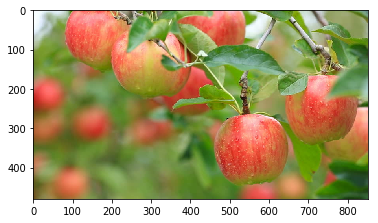

In [170]:
bgr_img = cv2.imread("appletree.jpg")
b,g,r = cv2.split(bgr_img)
image = cv2.merge([r,g,b])
plt.imshow(image)

In [190]:
(h,w,d)=image.shape
print(h,w,d)

480 852 3


In [5]:
(R, G, B) = image[400, 500]
print(R, G, B)

209 95 69


In [6]:
(R, G, B) = image[150, 300]
print(R, G, B)

195 171 61


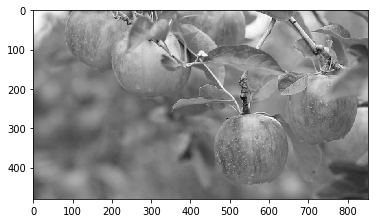

In [7]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

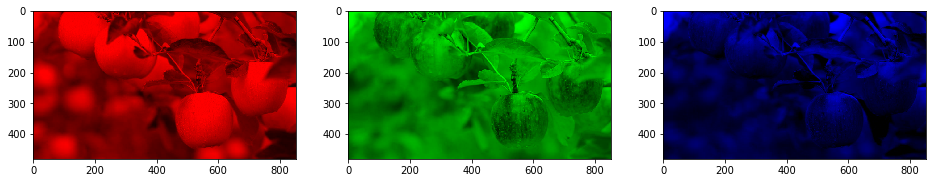

In [9]:
plt.figure(figsize=(16,4))
for i in range(3):
    channel = np.zeros_like(image)
    channel[:,:,i] = image[:,:,i]
    plt.subplot(1,3,i+1)
    plt.imshow(channel)
plt.show()    

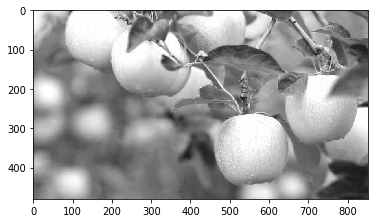

In [26]:
channel = np.zeros_like(image)
channel[:,:,0] = image[:,:,0]
gray = cv2.cvtColor(channel,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

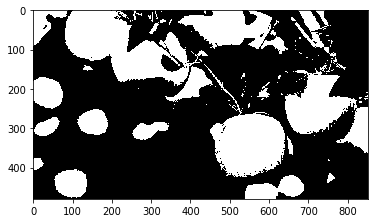

In [83]:
threshold=51
threshold_value=255

thresh = cv2.threshold(gray, threshold,threshold_value, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap='gray')

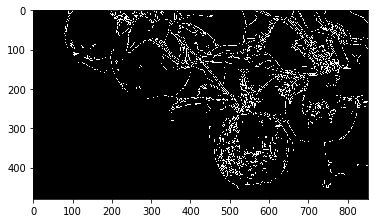

In [84]:
edged = cv2.Canny(gray, 10, 40)
plt.imshow(edged, cmap='gray')

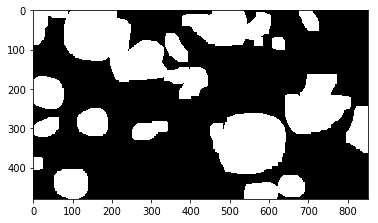

In [90]:
thresh=cv2.erode(thresh, None, iterations = 5)
thresh=cv2.dilate(thresh, None, iterations = 8)
plt.imshow(thresh, cmap='gray')

In [87]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

In [92]:
len(cnts)

18

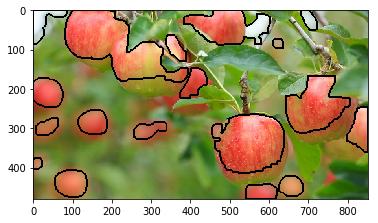

In [91]:
for c in cnts:
  
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3) 
      
plt.imshow(output)

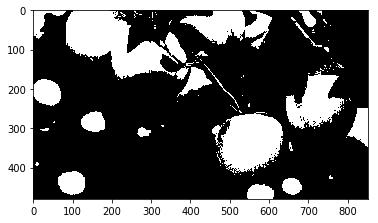

In [93]:
# Range for lower red
upper_red = np.array([255,255,255])
lower_red = np.array([195,0,0])
mask1 = cv2.inRange(image, lower_red, upper_red)

plt.imshow(mask1, cmap='gray')

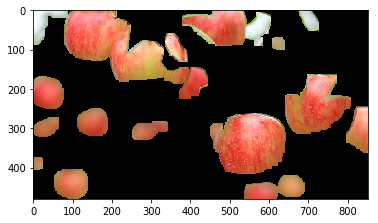

In [94]:
output = cv2.bitwise_and(image, image, mask=thresh)
plt.imshow(output)

# Weekly project part 2
    A) Can you cut man from image "itssp.png" and put him in another image?
    B) Can you make the cutout better with erroding/dialating?

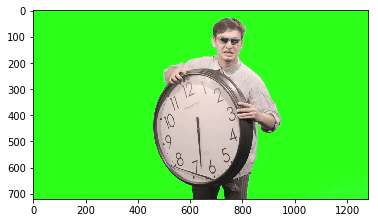

In [174]:
bgr_img = cv2.imread("ittsp.png")
b,g,r = cv2.split(bgr_img)
image2 = cv2.merge([r,g,b])
plt.imshow(image2)

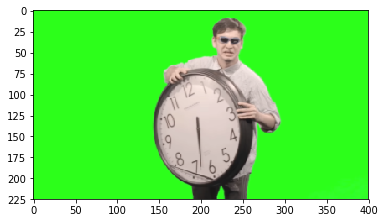

In [199]:
image2 = imutils.resize(image2, width=400)
plt.imshow(image2)

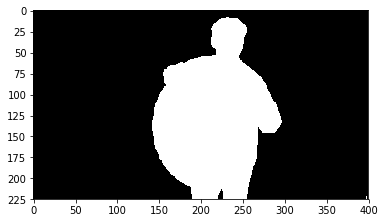

In [200]:
# Range for lower red
upper_green = np.array([255,255,255])
lower_green = np.array([0,250,0])
mask1 = cv2.inRange(image2, lower_green, upper_green)
mask1 = cv2.bitwise_not(mask1)
plt.imshow(mask1, cmap='gray')

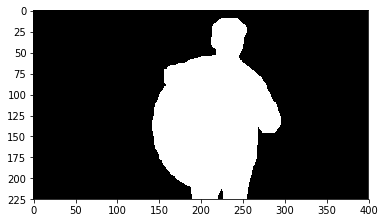

In [201]:
mask1=cv2.erode(mask1, None, iterations = 3)
mask1=cv2.dilate(mask1, None, iterations = 3)
plt.imshow(mask1, cmap='gray')

In [202]:
cnts = cv2.findContours(mask1.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

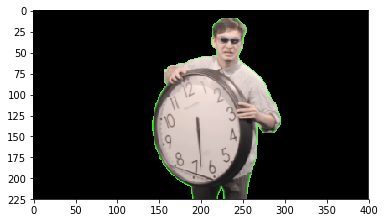

In [203]:
output = cv2.bitwise_and(image2, image2, mask=mask1)
plt.imshow(output)

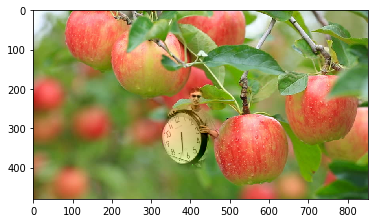

In [206]:
#new_img = cv2.bitwise_and(image, image, mask=resized)
center=(400,300)
new_img = cv2.seamlessClone(image2, image, mask1, center,cv2.NORMAL_CLONE)
plt.imshow(new_img)